In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings

In [28]:


#Load the project's data
data_climate = pd.read_csv('data_fortaleza-CE.csv')
data_climate.columns = ['codigo_estacao','data','hora','temp_inst','temp_max','temp_min','umid_inst','umid_max','umid_min','pto_orvalho_inst','pto_orvalho_max','pto_orvalho_min','pressao','pressao_max','pressao_min','vento_direcao','vento_vel','vento_rajada','radiacao','precipitacao']


In [29]:
#fix random seed for reproducibility
np.random.seed(0)

#using neural networks recurrents
#network short memory with LSTM, she use backpropagation through time and have memory block instead neruons.
dataset = pd.DataFrame(data_climate[['hora','temp_inst','umid_inst','pto_orvalho_inst','pressao','vento_rajada','vento_direcao','vento_vel']])
dataset = dataset.values
dataset = dataset.astype('float32')

#To reduce the data from [0,1] scale with pre-preprocessing
#Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [30]:
#split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train,test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print('Train dimensions ->{}'.format(train.shape))
print('Test dimensions ->{}'.format(test.shape))


Train dimensions ->(1276, 8)
Test dimensions ->(629, 8)


In [31]:
'''
To define a new dataset
args : the olg dataset(np array),
       look_back(you select times before and number steps for prevent the next period)
'''
# convert an array of values into a dataset matrix
def create_new_dataset(dataset,look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

In [32]:
#In this new_dataset, the fisrt columns is X=t and second is Y=t+1
new_dataset = create_new_dataset(dataset)

#reshape into X = t and Y = t+1
look_back = 1
trainX,trainY = create_new_dataset(train,look_back)
testX,testY = create_new_dataset(test,look_back)

In [33]:
'''
LSTM needs the X(inputs) args this form: [samples,time steps, features], 
now the data is = [samples,features], we uses the numpy.reshape() for reshape
'''
#reshape input to be [samples,time steps, features]
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))


In [34]:
'''
Now, the LSTM!!!

LSTM needs 3 layers : 1ºinput layer
                      2ºhidden layer with 4 LSTM blocks or neural
                      3ºoutput layer

 - General is just one output;
 - Sigmoid function is used for LSTM blocks;
 - For default, is 100 epoch by train.
'''

#To ignore the warnings
warnings.filterwarnings('ignore')

#create and fir the LSTM network
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=1000,batch_size=1,verbose=2)

Epoch 1/1000
 - 7s - loss: 0.1006
Epoch 2/1000
 - 4s - loss: 0.0554
Epoch 3/1000
 - 4s - loss: 0.0517
Epoch 4/1000
 - 4s - loss: 0.0506
Epoch 5/1000
 - 5s - loss: 0.0509
Epoch 6/1000
 - 4s - loss: 0.0505
Epoch 7/1000
 - 5s - loss: 0.0507
Epoch 8/1000
 - 4s - loss: 0.0506
Epoch 9/1000
 - 4s - loss: 0.0505
Epoch 10/1000
 - 4s - loss: 0.0505
Epoch 11/1000
 - 4s - loss: 0.0504
Epoch 12/1000
 - 4s - loss: 0.0502
Epoch 13/1000
 - 4s - loss: 0.0502
Epoch 14/1000
 - 4s - loss: 0.0502
Epoch 15/1000
 - 5s - loss: 0.0501
Epoch 16/1000
 - 4s - loss: 0.0498
Epoch 17/1000
 - 4s - loss: 0.0502
Epoch 18/1000
 - 4s - loss: 0.0498
Epoch 19/1000
 - 4s - loss: 0.0498
Epoch 20/1000
 - 4s - loss: 0.0501
Epoch 21/1000
 - 4s - loss: 0.0496
Epoch 22/1000
 - 5s - loss: 0.0497
Epoch 23/1000
 - 4s - loss: 0.0497
Epoch 24/1000
 - 4s - loss: 0.0498
Epoch 25/1000
 - 4s - loss: 0.0494
Epoch 26/1000
 - 4s - loss: 0.0494
Epoch 27/1000
 - 4s - loss: 0.0498
Epoch 28/1000
 - 4s - loss: 0.0495
Epoch 29/1000
 - 4s - loss: 0

Epoch 232/1000
 - 3s - loss: 0.0451
Epoch 233/1000
 - 3s - loss: 0.0454
Epoch 234/1000
 - 3s - loss: 0.0451
Epoch 235/1000
 - 3s - loss: 0.0453
Epoch 236/1000
 - 3s - loss: 0.0451
Epoch 237/1000
 - 3s - loss: 0.0453
Epoch 238/1000
 - 3s - loss: 0.0452
Epoch 239/1000
 - 3s - loss: 0.0451
Epoch 240/1000
 - 3s - loss: 0.0450
Epoch 241/1000
 - 3s - loss: 0.0452
Epoch 242/1000
 - 3s - loss: 0.0451
Epoch 243/1000
 - 3s - loss: 0.0452
Epoch 244/1000
 - 3s - loss: 0.0452
Epoch 245/1000
 - 3s - loss: 0.0451
Epoch 246/1000
 - 3s - loss: 0.0450
Epoch 247/1000
 - 3s - loss: 0.0452
Epoch 248/1000
 - 3s - loss: 0.0450
Epoch 249/1000
 - 3s - loss: 0.0451
Epoch 250/1000
 - 3s - loss: 0.0450
Epoch 251/1000
 - 3s - loss: 0.0452
Epoch 252/1000
 - 3s - loss: 0.0451
Epoch 253/1000
 - 3s - loss: 0.0451
Epoch 254/1000
 - 3s - loss: 0.0450
Epoch 255/1000
 - 3s - loss: 0.0451
Epoch 256/1000
 - 3s - loss: 0.0449
Epoch 257/1000
 - 3s - loss: 0.0450
Epoch 258/1000
 - 3s - loss: 0.0450
Epoch 259/1000
 - 3s - loss:

Epoch 460/1000
 - 3s - loss: 0.0434
Epoch 461/1000
 - 3s - loss: 0.0430
Epoch 462/1000
 - 3s - loss: 0.0431
Epoch 463/1000
 - 3s - loss: 0.0432
Epoch 464/1000
 - 3s - loss: 0.0432
Epoch 465/1000
 - 3s - loss: 0.0432
Epoch 466/1000
 - 3s - loss: 0.0432
Epoch 467/1000
 - 3s - loss: 0.0430
Epoch 468/1000
 - 3s - loss: 0.0433
Epoch 469/1000
 - 3s - loss: 0.0430
Epoch 470/1000
 - 3s - loss: 0.0433
Epoch 471/1000
 - 3s - loss: 0.0433
Epoch 472/1000
 - 3s - loss: 0.0431
Epoch 473/1000
 - 3s - loss: 0.0430
Epoch 474/1000
 - 3s - loss: 0.0433
Epoch 475/1000
 - 3s - loss: 0.0429
Epoch 476/1000
 - 3s - loss: 0.0430
Epoch 477/1000
 - 3s - loss: 0.0430
Epoch 478/1000
 - 3s - loss: 0.0431
Epoch 479/1000
 - 3s - loss: 0.0431
Epoch 480/1000
 - 3s - loss: 0.0432
Epoch 481/1000
 - 3s - loss: 0.0431
Epoch 482/1000
 - 3s - loss: 0.0430
Epoch 483/1000
 - 3s - loss: 0.0431
Epoch 484/1000
 - 3s - loss: 0.0431
Epoch 485/1000
 - 3s - loss: 0.0430
Epoch 486/1000
 - 3s - loss: 0.0430
Epoch 487/1000
 - 3s - loss:

Epoch 688/1000
 - 3s - loss: 0.0416
Epoch 689/1000
 - 3s - loss: 0.0417
Epoch 690/1000
 - 3s - loss: 0.0416
Epoch 691/1000
 - 3s - loss: 0.0416
Epoch 692/1000
 - 3s - loss: 0.0418
Epoch 693/1000
 - 3s - loss: 0.0417
Epoch 694/1000
 - 3s - loss: 0.0415
Epoch 695/1000
 - 3s - loss: 0.0417
Epoch 696/1000
 - 3s - loss: 0.0416
Epoch 697/1000
 - 3s - loss: 0.0412
Epoch 698/1000
 - 3s - loss: 0.0415
Epoch 699/1000
 - 3s - loss: 0.0416
Epoch 700/1000
 - 3s - loss: 0.0416
Epoch 701/1000
 - 3s - loss: 0.0418
Epoch 702/1000
 - 3s - loss: 0.0415
Epoch 703/1000
 - 3s - loss: 0.0418
Epoch 704/1000
 - 3s - loss: 0.0416
Epoch 705/1000
 - 3s - loss: 0.0417
Epoch 706/1000
 - 3s - loss: 0.0415
Epoch 707/1000
 - 3s - loss: 0.0416
Epoch 708/1000
 - 3s - loss: 0.0416
Epoch 709/1000
 - 3s - loss: 0.0417
Epoch 710/1000
 - 3s - loss: 0.0418
Epoch 711/1000
 - 3s - loss: 0.0415
Epoch 712/1000
 - 3s - loss: 0.0417
Epoch 713/1000
 - 3s - loss: 0.0418
Epoch 714/1000
 - 3s - loss: 0.0417
Epoch 715/1000
 - 3s - loss:

Epoch 916/1000
 - 3s - loss: 0.0408
Epoch 917/1000
 - 3s - loss: 0.0409
Epoch 918/1000
 - 3s - loss: 0.0409
Epoch 919/1000
 - 3s - loss: 0.0412
Epoch 920/1000
 - 3s - loss: 0.0409
Epoch 921/1000
 - 3s - loss: 0.0408
Epoch 922/1000
 - 3s - loss: 0.0411
Epoch 923/1000
 - 3s - loss: 0.0407
Epoch 924/1000
 - 3s - loss: 0.0408
Epoch 925/1000
 - 3s - loss: 0.0407
Epoch 926/1000
 - 3s - loss: 0.0408
Epoch 927/1000
 - 3s - loss: 0.0409
Epoch 928/1000
 - 3s - loss: 0.0410
Epoch 929/1000
 - 3s - loss: 0.0409
Epoch 930/1000
 - 3s - loss: 0.0408
Epoch 931/1000
 - 3s - loss: 0.0408
Epoch 932/1000
 - 3s - loss: 0.0406
Epoch 933/1000
 - 3s - loss: 0.0408
Epoch 934/1000
 - 3s - loss: 0.0410
Epoch 935/1000
 - 3s - loss: 0.0407
Epoch 936/1000
 - 3s - loss: 0.0409
Epoch 937/1000
 - 3s - loss: 0.0407
Epoch 938/1000
 - 3s - loss: 0.0408
Epoch 939/1000
 - 3s - loss: 0.0410
Epoch 940/1000
 - 3s - loss: 0.0408
Epoch 941/1000
 - 3s - loss: 0.0408
Epoch 942/1000
 - 3s - loss: 0.0409
Epoch 943/1000
 - 3s - loss:

In [35]:
#Try inverse predictions

#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.20 RMSE
Test Score: 0.33 RMSE


In [36]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [37]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

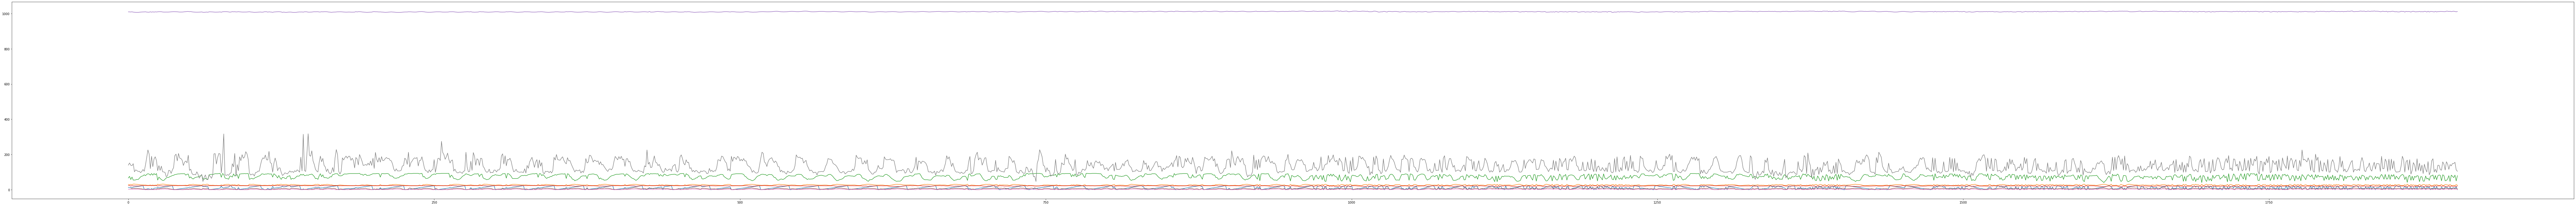

In [38]:
# plot baseline and predictions
plt.rcParams['figure.figsize'] = (152,12)
plt.plot(scaler.inverse_transform(dataset))

In [39]:
trainPredictPlot.shape

(1905, 8)

In [40]:
testPredictPlot.shape

(1905, 8)

In [41]:
trainPredict.shape

(1274, 1)

In [42]:
testPredict.shape

(627, 1)

In [43]:
trainPredict

array([[0.600505  ],
       [0.53212345],
       [0.6352316 ],
       ...,
       [0.70709115],
       [0.67068803],
       [0.6352316 ]], dtype=float32)

In [44]:
testPredict

array([[0.53212345],
       [0.4628557 ],
       [0.42692733],
       [0.38969016],
       [0.2346394 ],
       [0.31126952],
       [0.20570922],
       [0.27157605],
       [0.35102963],
       [0.9141104 ],
       [0.7677302 ],
       [0.75799406],
       [0.70709115],
       [0.54546094],
       [0.8925101 ],
       [0.8609215 ],
       [0.6352316 ],
       [0.600505  ],
       [0.5662403 ],
       [0.53212345],
       [0.49779177],
       [0.4628557 ],
       [0.42692733],
       [0.38969016],
       [0.35102963],
       [0.31126952],
       [0.27157605],
       [0.2346394 ],
       [0.20570922],
       [0.19407701],
       [0.67068803],
       [0.21481061],
       [0.81933117],
       [0.81933117],
       [0.7677302 ],
       [0.70709115],
       [0.67068803],
       [0.6352316 ],
       [0.600505  ],
       [0.5662403 ],
       [0.53212345],
       [0.4628557 ],
       [0.42692733],
       [0.35102963],
       [0.31126952],
       [0.27157605],
       [0.2346394 ],
       [0.205

In [45]:
trainX.shape

(1274, 1, 1)

In [46]:
trainX

array([[[0.5652174 ]],

       [[0.47826087]],

       [[0.6086957 ]],

       ...,

       [[0.6956522 ]],

       [[0.65217394]],

       [[0.6086957 ]]], dtype=float32)

In [47]:
testX.shape

(627, 1, 1)

In [48]:
testX

array([[[0.47826087]],

       [[0.39130434]],

       [[0.3478261 ]],

       [[0.30434784]],

       [[0.13043478]],

       [[0.21739131]],

       [[0.08695652]],

       [[0.17391305]],

       [[0.26086956]],

       [[0.9130435 ]],

       [[0.73913044]],

       [[0.95652175]],

       [[0.6956522 ]],

       [[1.        ]],

       [[0.86956525]],

       [[0.826087  ]],

       [[0.6086957 ]],

       [[0.5652174 ]],

       [[0.5217391 ]],

       [[0.47826087]],

       [[0.43478262]],

       [[0.39130434]],

       [[0.3478261 ]],

       [[0.30434784]],

       [[0.26086956]],

       [[0.21739131]],

       [[0.17391305]],

       [[0.13043478]],

       [[0.08695652]],

       [[0.04347826]],

       [[0.65217394]],

       [[0.        ]],

       [[0.7826087 ]],

       [[0.7826087 ]],

       [[0.73913044]],

       [[0.6956522 ]],

       [[0.65217394]],

       [[0.6086957 ]],

       [[0.5652174 ]],

       [[0.5217391 ]],

       [[0.47826087]],

       [[0.39130

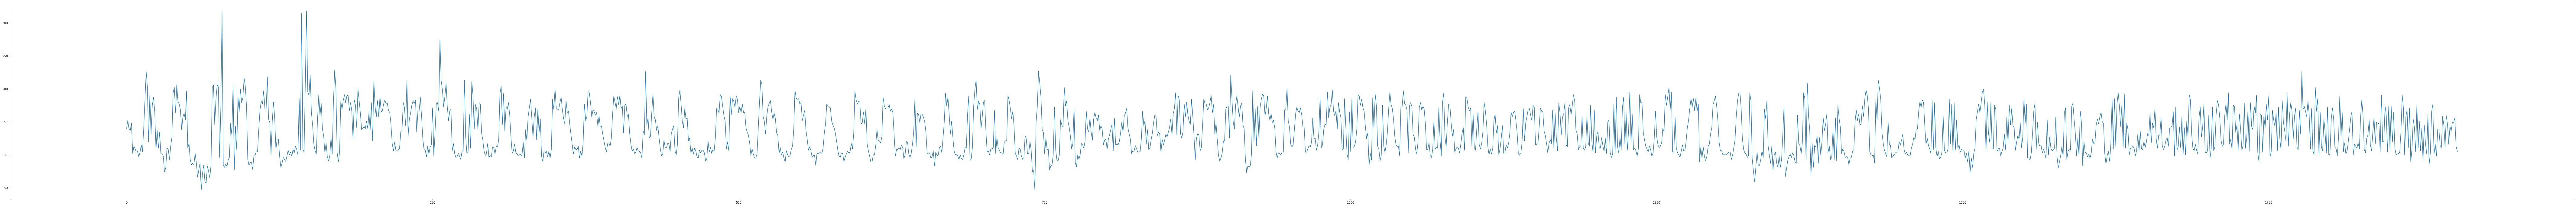

In [49]:
plt.plot(data_climate.vento_vel)

In [50]:
data_climate.vento_vel

0       140
1       152
2       139
3       137
4       148
       ... 
1900    149
1901    149
1902    156
1903    113
1904    105
Name: vento_vel, Length: 1905, dtype: int64

In [51]:
trainX.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'